# <u>Data Input and Output.

In [2]:
import numpy as np
import pandas as pd

---

# <u>Reading a file using </u>pd.read_filetype() <u>method.

Pandas can read a variety of file types using its pd.read_ methods. Let's take a look at the most common data types:

**In this lecture we're going to be concerned with just four main data sources:**

    1) CSV
    2) Excel
    3) HTML
    4) SQL

**In order to work with HTML files and SQL databases with pandas we'll need to install 4 libraries(by pip or conda):**

    - conda install sqlalchemy

    - conda install lxml

    - conda install html5lib (pip install html5lib worked here.)

    - conda install BeautifulSoup4 (pip install BeautifulSoup4 worked here.)

    - All installed !!!

**In order to work with excel files with pandas we'll need to install xlrd library(by pip or conda):**

    - conda install xlrd (pip install xlrd worked.)

    - Comes in with the Anaconda distribution.

    - Installed !!!

- <u>NOTE:

    - Make sure the example.csv and Excel_Sample.xlsx files are in the same directory as this notebook otherwise we'll have to provide the entire file path.

In [9]:
# To know the current working directory.
# Can't comment in the same cell as pwd.

In [10]:
pwd

'C:\\Users\\user1\\Desktop\\Study\\Python Advanced\\Section 6 - Python for Data Analysis - Pandas'

In [11]:
# OR

import os

os.getcwd()

'C:\\Users\\user1\\Desktop\\Study\\Python Advanced\\Section 6 - Python for Data Analysis - Pandas'

---

# <u>1) CSV

### CSV Input (Reading)

    Syntax: pd.read_csv('file_path')
            pd.read_csv('example.csv')

In [14]:
# Tab to autocomplete the file name.
# We have example file not example.csv, if we had example.csv we would have used that.

df = pd.read_csv('example')
df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [15]:
# pd.read_
# Hit tab to see variety of formats that pandas can read from.

### CSV Output (Writing)

    Syntax: df.to_csv('new_filename/filepath', index = True)
            where;
                    index = True ---> Set to False.
                    The reason for that is because I don't actually want to save the index as a column.

In [17]:
df.to_csv('My_output', index = True)

In [18]:
pd.read_csv('My_output')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [19]:
# Overwriting My_output.

df.to_csv('My_output', index = False)
pd.read_csv('My_output')

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [20]:
# df.to_
# Hit tab to see variety of formats that pandas can write from. (same formats as in pd.read_)

---

# <u>2) Excel

Pandas can read and write excel files, keep in mind, this only imports data. Not formulas or images, having images or macros may cause this read_excel method to crash.

### Excel Input (Reading)

    Syntax: pd.read_excel('filename/file_path', sheet_name = 'None')

- <u>NOTE:

Excel_Sample.xlsx file

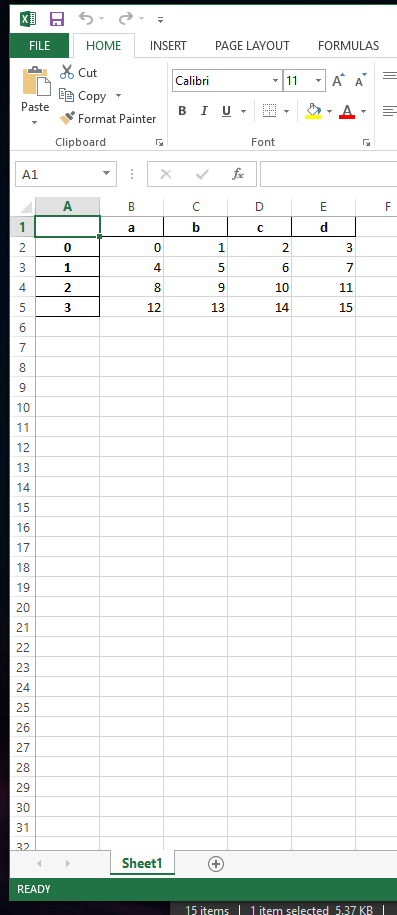

It's just a bunch of sheets and each sheet is a DataFrame. That's how Pandas think about an excel file. 

In [25]:
df1 = pd.read_excel('Excel_Sample.xlsx', sheet_name = 'Sheet1')
df1

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


### Excel Output (Writing)

    Syntax: df.to_excel('new_filename/file_path', sheet_name = 'None')

In [27]:
df1.to_excel('Excel_Sample2.xlsx', sheet_name = 'NewSheet', index = False)

In [28]:
pd.read_excel('Excel_Sample2.xlsx', sheet_name = 'NewSheet')

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


---

# <u>3) HTML

We may need to install html5lib, lxml, and BeautifulSoup4. In our terminal/command prompt run:

    conda install lxml
    conda install html5lib
    conda install BeautifulSoup4

Then restart Jupyter Notebook.
(or use pip install if we aren't using the Anaconda Distribution)

### HTML Input (Reading)

Pandas read_html function will read tables off of a webpage and return a list of DataFrame objects:

Syntax:

    pd.read_html('URL')

    where;
        URL = Uniform Resource Locator(site address).

### Example Reading tables from https://www.fdic.gov/bank-failures/failed-bank-list Failed Bank List | FDIC.gov

In [33]:
df2 = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [34]:
type(df2)

list

- <u>NOTE:

    - Notice type(df) is a list since the site may contain multiple tables. For our use case the first item in df is our required table.

In [36]:
df2[0]

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund Sort ascending
0,The Santa Anna National Bank,Santa Anna,Texas,5520,Coleman County State Bank,"June 27, 2025",10549
1,Pulaski Savings Bank,Chicago,Illinois,28611,Millennium Bank,"January 17, 2025",10548
2,The First National Bank of Lindsay,Lindsay,Oklahoma,4134,First Bank & Trust Co.,"October 18, 2024",10547
3,Republic First Bank dba Republic Bank,Philadelphia,Pennsylvania,27332,"Fulton Bank, National Association","April 26, 2024",10546
4,Citizens Bank,Sac City,Iowa,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545
5,Heartland Tri-State Bank,Elkhart,Kansas,25851,"Dream First Bank, N.A.","July 28, 2023",10544
6,First Republic Bank,San Francisco,California,59017,"JPMorgan Chase Bank, N.A.","May 1, 2023",10543
7,Signature Bank,New York,New York,57053,"Flagstar Bank, N.A.","March 12, 2023",10540
8,Silicon Valley Bank,Santa Clara,California,24735,First Citizens Bank & Trust Company,"March 10, 2023",10539
9,Almena State Bank,Almena,Kansas,15426,Equity Bank,"October 23, 2020",10538


In [37]:
# To get just the 5 rows back.

df2[0].head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund Sort ascending
0,The Santa Anna National Bank,Santa Anna,Texas,5520,Coleman County State Bank,"June 27, 2025",10549
1,Pulaski Savings Bank,Chicago,Illinois,28611,Millennium Bank,"January 17, 2025",10548
2,The First National Bank of Lindsay,Lindsay,Oklahoma,4134,First Bank & Trust Co.,"October 18, 2024",10547
3,Republic First Bank dba Republic Bank,Philadelphia,Pennsylvania,27332,"Fulton Bank, National Association","April 26, 2024",10546
4,Citizens Bank,Sac City,Iowa,8758,Iowa Trust & Savings Bank,"November 3, 2023",10545


In [38]:
# IndexError: list index out of range
# df2[1]

---

# <u>SQL

### For PostgreSQL:

    Required libraries:
    We already installed SQLAlchemy by conda install sqlalchemy
    The SQLAlchemy engine is the connection object that links Python to our SQL database.
    We need to install psycopg2 also. (conda install psycopg2)
    Done with pip install psycopg2.

**INPUT (READING)**

In [43]:
from sqlalchemy import create_engine

In [44]:
# Fill in your PostgreSQL details

user = 'postgres'
password = 'ducati1200'
host = 'localhost'   # or the server IP
port = '5432'        # default PostgreSQL port
database = 'dvdrental'

In [45]:
# Create SQLAlchemy engine

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

In [46]:
# Read full table into pandas DataFrame

df3 = pd.read_sql_table('actor', con = engine)

In [47]:
df3.head()

,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.620
1,2,Nick,Wahlberg,2013-05-26 14:47:57.620
2,3,Ed,Chase,2013-05-26 14:47:57.620
3,4,Jennifer,Davis,2013-05-26 14:47:57.620
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.620


**WRITING (OUTPUT)**

Creating a simple DataFrame df4 to write.

In [50]:
np.random.rand(5,5)

array([[0.22227429, 0.51393044, 0.16860428, 0.53179628, 0.56129983],
       [0.90573166, 0.56424926, 0.6846622 , 0.50549761, 0.98513919],
       [0.51800384, 0.59353896, 0.86363717, 0.17644517, 0.31963154],
       [0.44899709, 0.96820184, 0.72345752, 0.01314462, 0.99012011],
       [0.00126644, 0.11717397, 0.29046856, 0.48738085, 0.32308724]])

In [51]:
np.arange(5) 

array([0, 1, 2, 3, 4])

In [52]:
'A B C D E'.split()

['A', 'B', 'C', 'D', 'E']

In [53]:
df4 = pd.DataFrame(data = np.random.randn(5, 5), index = np.arange(5), columns = 'A B C D E'.split())
df4

,A,B,C,D,E
0,0.825148,-0.162607,-0.570232,0.671379,0.030884
1,1.022443,-0.659451,0.439593,-0.637199,2.024531
2,0.413793,-0.467195,-1.006072,0.986658,0.162788
3,-0.928239,0.821025,-1.168298,-1.963491,0.512274
4,0.613623,0.977047,-0.478486,1.531371,-2.769715


In [62]:
# Assume you already have 'engine' created with SQLAlchemy
# and 'df4' is your DataFrame.

df4.to_sql(
    name = 'dataframepandas',     # table name in the database # case sensitive
    con = engine,                 # SQLAlchemy engine
    if_exists = 'fail',           # options: 'fail', 'replace', 'append'
    index = False)                # do not write DataFrame index as a column

5

if_exists options:

"fail" → throws error if table exists.

"replace" → drops the table if it exists, then creates a new one.

"append" → adds new rows to the existing table.

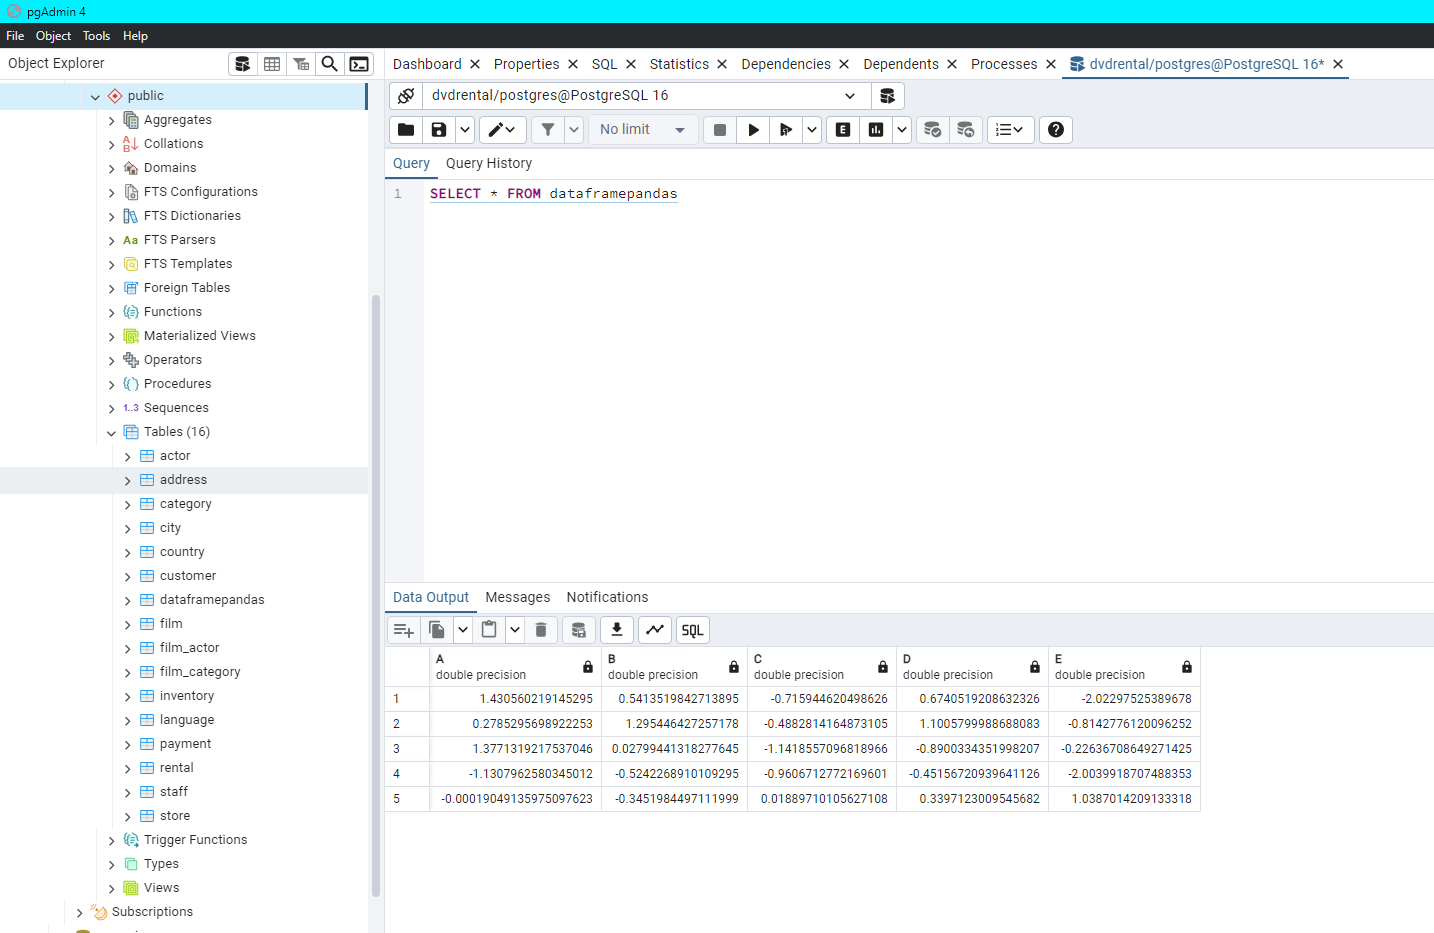

- <u>NOTE:

    - The PostgreSQL server must be running in the background for pandas (via SQLAlchemy + psycopg2) to connect.

### Additional NOTES:

The pandas.io.sql module provides a collection of query wrappers to both facilitate data retrieval and to reduce dependency on DB-specific API. Database abstraction is provided by SQLAlchemy if installed. In addition you will need a driver library for your database. Examples of such drivers are psycopg2 for PostgreSQL or pymysql for MySQL. For SQLite this is included in Python’s standard library by default. You can find an overview of supported drivers for each SQL dialect in the SQLAlchemy docs.


If SQLAlchemy is not installed, a fallback is only provided for sqlite (and for mysql for backwards compatibility, but this is deprecated and will be removed in a future version). This mode requires a Python database adapter which respect the Python DB-API.

See also some cookbook examples for some advanced strategies.

The key functions are:

* read_sql_table(table_name, con[, schema, ...])	
    * Read SQL database table into a DataFrame.
* read_sql_query(sql, con[, index_col, ...])	
    * Read SQL query into a DataFrame.
* read_sql(sql, con[, index_col, ...])	
    * Read SQL query or database table into a DataFrame.
* DataFrame.to_sql(name, con[, flavor, ...])	
    * Write records stored in a DataFrame to a SQL database.

### For SQLite(Optional):

In [64]:
df5 = pd.DataFrame(data = np.random.randn(5, 5), index = np.arange(5), columns = 'F G H I J'.split())
df5

,F,G,H,I,J
0,-0.803412,-0.823310,-1.151897,-1.603577,-0.520743
1,-2.473898,-0.150421,-0.926884,-0.327914,0.257416
2,1.523975,0.728852,0.787062,-1.263855,0.872698
3,-0.176829,1.096815,2.009840,-0.798299,-0.437587
4,-0.835160,-0.527848,0.359616,0.305227,2.280390


In [66]:
from sqlalchemy import create_engine

In [68]:
engine = create_engine('sqlite:///:memory:')

**OUTPUT**

In [70]:
df5.to_sql('data', con = engine, index = False)

5

**INPUT**

In [73]:
sql_df5 = pd.read_sql('data', con = engine)

In [75]:
sql_df5

,F,G,H,I,J
0,-0.803412,-0.823310,-1.151897,-1.603577,-0.520743
1,-2.473898,-0.150421,-0.926884,-0.327914,0.257416
2,1.523975,0.728852,0.787062,-1.263855,0.872698
3,-0.176829,1.096815,2.009840,-0.798299,-0.437587
4,-0.835160,-0.527848,0.359616,0.305227,2.280390


---